In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline

# 1.import data

In [161]:
data_set=pd.read_csv('C:\\Users\\User\\100-Days-Of-ML-Code-master\\datasets\\Social_Network_Ads.csv')
data_set.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


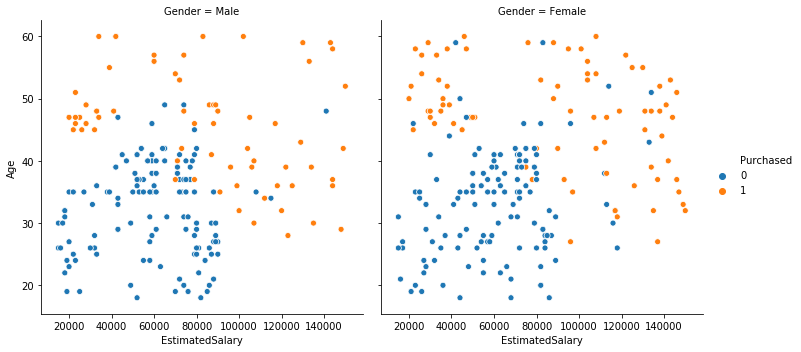

In [3]:
sns.relplot(x='EstimatedSalary',y='Age',hue='Purchased',data=data_set,col='Gender')

# 2.Data preprocessing

(1)Age,Salary標準化

In [4]:
from sklearn.preprocessing import StandardScaler

In [162]:
data_set2=data_set.iloc[:,1:]

In [163]:
data_set2['Age']=StandardScaler().fit_transform(data_set2['Age'].values.reshape(-1,1))
data_set2['EstimatedSalary']=StandardScaler().fit_transform(data_set2['EstimatedSalary'].values.reshape(-1,1))

C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [164]:
data_set2.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,-1.781797,-1.490046,0
1,Male,-0.253587,-1.460681,0
2,Female,-1.113206,-0.785290,0
3,Female,-1.017692,-0.374182,0
4,Male,-1.781797,0.183751,0


(2)Gender換成數字

In [165]:
from sklearn.preprocessing import LabelEncoder

In [166]:
data_set2['Gender']=LabelEncoder().fit_transform(data_set2['Gender'])

In [167]:
data_set2.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,-1.781797,-1.490046,0
1,1,-0.253587,-1.460681,0
2,0,-1.113206,-0.785290,0
3,0,-1.017692,-0.374182,0
4,1,-1.781797,0.183751,0


(3)切分數據集

In [11]:
from sklearn.model_selection import train_test_split

In [96]:
X=data_set.iloc[:,2:4]
Y=data_set.iloc[:,4]
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

# 3.Fit model

(1)train model

In [154]:
model_jmda=DecisionTreeClassifier(criterion='entropy',random_state=0,max_depth=4)
model_jmda.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

(2)see score

In [157]:
train_score=model_jmda.score(x_train,y_train)
test_score=model_jmda.score(x_test,y_test)
print('train_score:{}\ntest_score :{}'.format(train_score,test_score))

train_score:0.9285714285714286
test_score :0.9083333333333333


(3)不同參數對結果的影響重要性

Text(0, 0.5, 'importance')

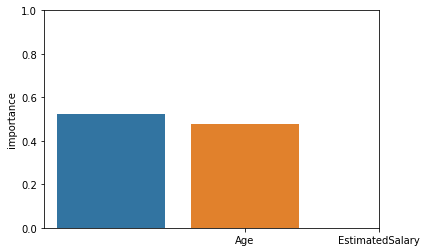

In [150]:
sns.barplot([1,2],model_jmda.feature_importances_)
plt.ylim(0,1)
plt.xticks([1,2],['Age','EstimatedSalary'])
plt.ylabel('importance')

(4)看預測錯的地方在哪

In [158]:
predic=model_jmda.predict(X)
wrong_index=data_set[data_set['Purchased'].values != predic]['Purchased'].index
data_set['Purchased'].iloc[wrong_index]='predict wrong'
data_set.head()

C:\Users\User\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


(5)看預測出模型的grid

In [155]:
xmap=np.meshgrid(np.linspace(18,60,500),np.linspace(15000,150000,500))
grid=pd.DataFrame({'Age':np.array(xmap[0].reshape(1,-1)[0]),'EstimatedSalary':np.array(xmap[1].reshape(1,-1)[0])})
ymap=model_jmda.predict(grid.values)
grid['predict_purchase']=ymap
grid.head()

,Age,EstimatedSalary,predict_purchase
0,18.000000,15000.0,0
1,18.084168,15000.0,0
2,18.168337,15000.0,0
3,18.252505,15000.0,0
4,18.336673,15000.0,0


(18, 60)

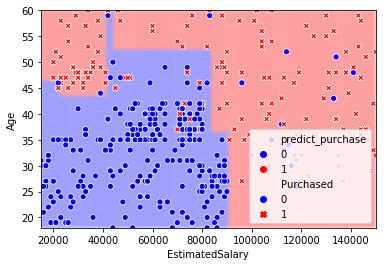

In [156]:
sns.scatterplot(x='EstimatedSalary',y='Age',hue='predict_purchase',data=grid,palette=['blue','red'],alpha=0.005)
sns.scatterplot(x='EstimatedSalary',y='Age',hue='Purchased',data=data_set,palette=['blue','red'],style='Purchased',)
plt.xlim(15000,150000);plt.ylim(18,60)

# 4.confusion matrix

In [168]:
from sklearn.metrics import confusion_matrix

In [19]:
test_predict=model_jmda.predict(X)
conmatrix=confusion_matrix(test_predict,Y)
conmatrix

array([[242,  49],
       [ 15,  94]], dtype=int64)

Text(6.0, 0.5, 'actual')

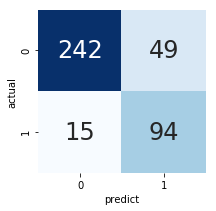

In [34]:
plt.figure(figsize=(3,3))
sns.heatmap(conmatrix,cmap='Blues',annot=True,annot_kws={'size':24},fmt='d',cbar=False)
plt.xlabel('predict');plt.ylabel('actual')